# BigMart Sales Prediction

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)



Dự án “Dự báo doanh số bán hàng” nhằm xây dựng mô hình dự đoán doanh số bán hàng của BigMart dựa trên dữ liệu từ 1559 sản phẩm tại 10 cửa hàng khác nhau. Dữ liệu bao gồm nhiều thuộc tính liên quan đến sản phẩm và cửa hàng, giúp xác định yếu tố nào có tác động lớn đến doanh số. Mục tiêu chính là giúp doanh nghiệp có cái nhìn chính xác hơn về doanh số tương lai để tối ưu hóa chiến lược kinh doanh, quản lý kho hàng và cải thiện lợi nhuận.

__Tìm ra feature ảnh hương mạnh đến doanh thu.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)
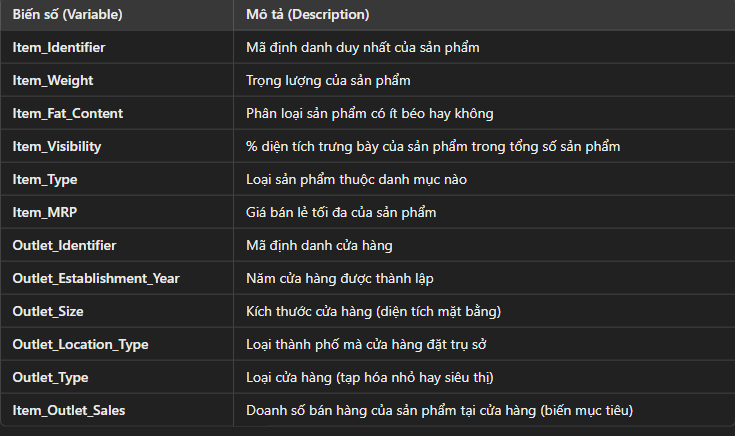

## Load Dataset


In [82]:
import pandas as pd

df = pd.read_csv('sales_prediction.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Chuẩn bị training 

chia 70% cho tập train và 30% cho tập test

In [83]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']



In [84]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5966, 11), (2557, 11), (5966,), (2557,))

In [85]:
X_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Snack Foods,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Frozen Foods,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


In [86]:
y_train.head(5)

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

In [87]:
y_test.head(5)


7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

## Xử lí dữ liệu thô + phân tích dữ liệu + feature engineering

In [88]:
X_train_c = X_train.copy()

### BASIC EDA

In [89]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [90]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [91]:
num_data = X_train_c.select_dtypes(exclude='object') # chọn các cột dữ liệu k phải object 

num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [92]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [93]:
num_data.isnull().sum() # cần phải xử lí missing value (cột Item_Weight)

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: ylabel='Item_Weight'>

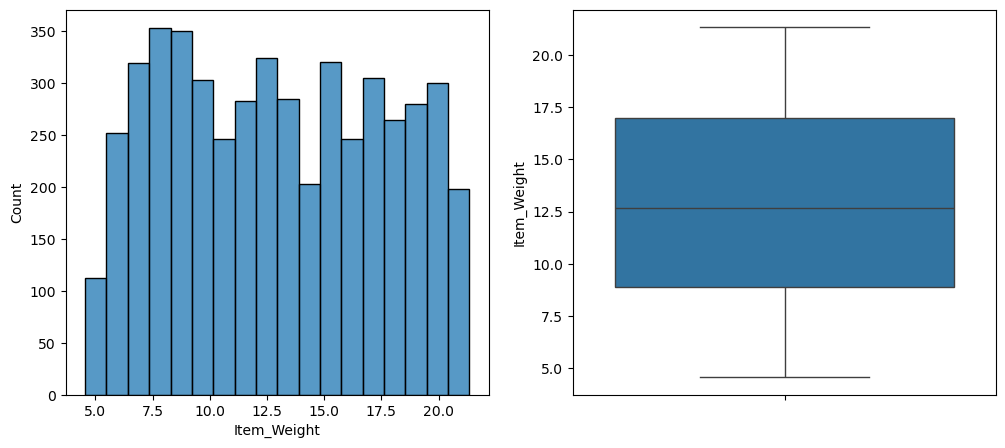

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data =  X_train_c ,x = 'Item_Weight',  ax=ax[0])
sns.boxplot(data =  X_train_c ,y = 'Item_Weight',  ax=ax[1])

In [96]:
def visualize_numberic_feature(data_frame, col_name):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(data =  data_frame ,x = col_name,  ax=ax[0])
    sns.boxplot(data =  data_frame ,y = col_name,  ax=ax[1])

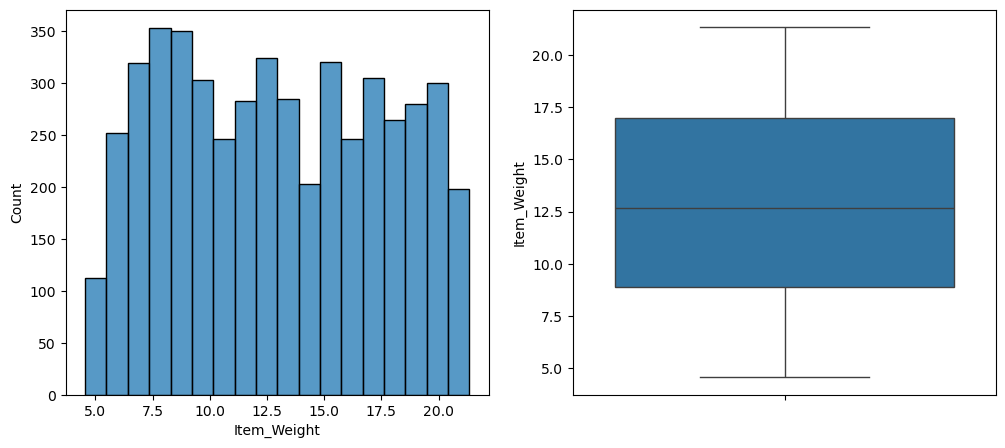

In [97]:
visualize_numberic_feature(X_train_c, 'Item_Weight')

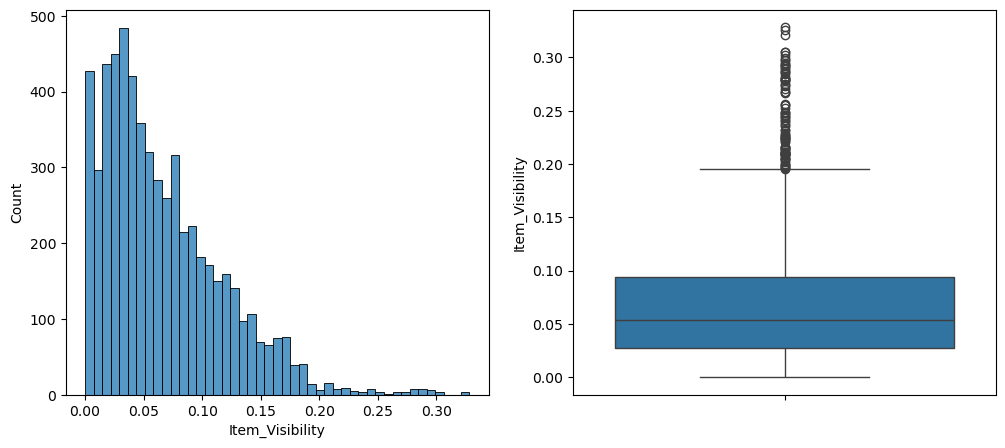

In [98]:
visualize_numberic_feature(X_train_c, 'Item_Visibility')

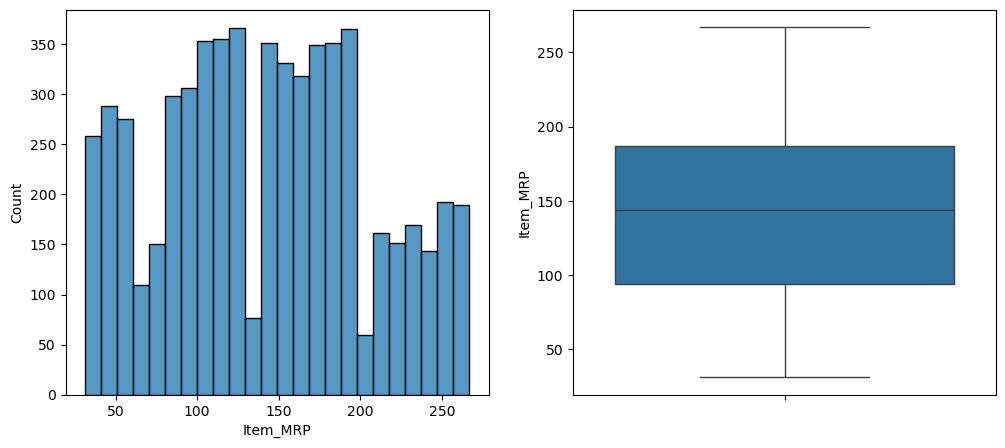

In [99]:
visualize_numberic_feature(X_train_c, 'Item_MRP')

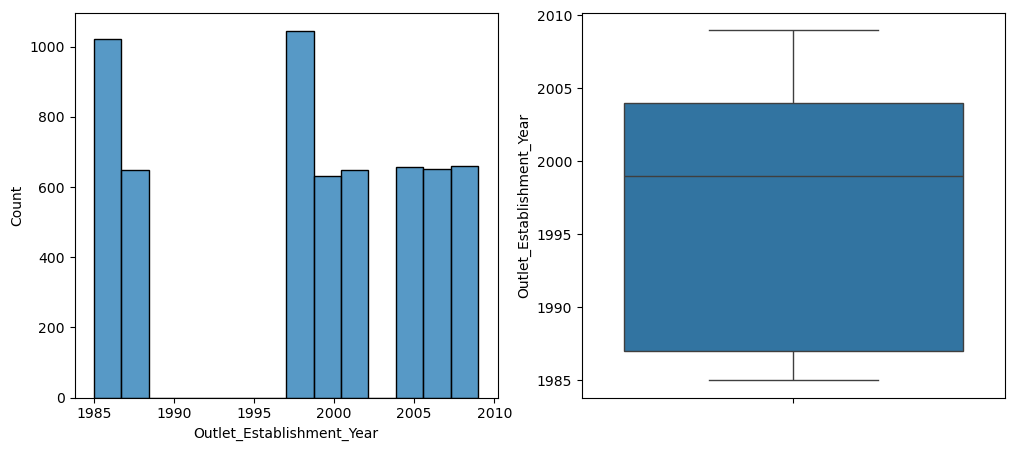

In [100]:
visualize_numberic_feature(X_train_c, 'Outlet_Establishment_Year')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

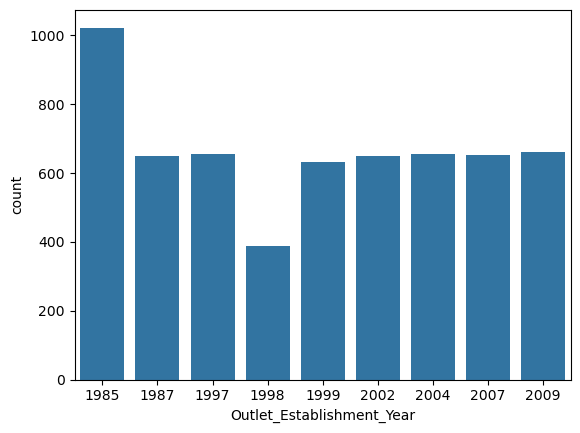

In [101]:
sns.countplot(data = X_train_c, x = 'Outlet_Establishment_Year')

In [102]:
cat_features = X_train_c.select_dtypes(include='object')
cat_features.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [103]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [104]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [105]:
cat_features['Item_Identifier'].value_counts()

Item_Identifier
NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: count, Length: 1543, dtype: int64

In [106]:
cat_features['Item_Fat_Content'].value_counts() 

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [107]:
cat_features['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: count, dtype: int64

In [108]:
cat_features['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: count, dtype: int64

In [109]:
cat_features['Outlet_Size'].value_counts()

Outlet_Size
Medium    1960
Small     1667
High       649
Name: count, dtype: int64

In [110]:
cat_features['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: count, dtype: int64

In [111]:
cat_features['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: count, dtype: int64

### Xử lí dữ liệu thô + Feature Engineering

#### Step 1: 
Cột Item_Indentifier và Cột Item_Type có nhiều giá trị khác nhau khi mà encoding thì nó sẽ ra nhiều cột nên cần giảm bớt các giá trị khác nhau 

Mà Cột Item_Identifier và Cột Item_Type có liên hệ với nhau. VD Item ID bắt đầu bằng FD -> Food, DR -> Drink,...

Như vậy sẽ giảm được số cột khi encoding

In [112]:
X_train_c['Item_Identifier'].str[:2].value_counts()

Item_Identifier
FD    4269
NC    1137
DR     560
Name: count, dtype: int64

In [113]:
# Map Item ID -> Item Types

def create_item_type(data_frame):
    data_frame['Item_Type'] = data_frame['Item_Identifier'].str[:2]
    data_frame['Item_Type'] = data_frame['Item_Type'].map(
                                                        {'FD': 'Food', 
                                                        'NC': 'Non-Consumable', 
                                                        'DR': 'Drinks'})
    return data_frame

In [114]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non-Consumable,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


#### Step 2: Điền vào các giá trị trống cho Item_Weight

In [115]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [116]:
X_train_c[['Item_Identifier','Item_Weight']].drop_duplicates().sort_values(by ='Item_Identifier')

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


Ta thấy Item có cùng ID là DRA59 nhưng 1 cái k có giá trị, 1 cái có cân nặng là 8.27 -> có thể thay NaN thành giá trị có cùng ID

Nếu k có cái nào cùng ID -> thay thế = median theo item type (vd: weight ở type drink bị thiếu thì lấy giá trị median theo type drink,...)

In [117]:
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(index='Item_Identifier', values='Item_Weight').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [118]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(index='Item_Type', values='Item_Weight', aggfunc = 'median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip(ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items()


dict_items([('Drinks', 11.8), ('Food', 12.8), ('Non-Consumable', 13.05)])

In [119]:
def impute_item_weight(data_frame):
    # Điền missing value cho cột Item_Weight dựa trên Item_Identifier
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
    # Điền missing value bằng median
    data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Type'].map(ITEM_TYPE_WEIGHT_MAPPING))
    return data_frame

In [120]:
X_train_c = impute_item_weight(X_train_c)

In [121]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Điền missing values cho cột Outlet_Size

In [122]:
X_train_c.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

Điền missing values của cột Outlet_Size bằng cách sử dụng mode theo cột Outlet_Type

In [123]:
from scipy.stats import mode
OUTLET_TYPE_SIZE_PIVOT = X_train_c.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else np.nan
).reset_index()
OUTLET_TYPE_SIZE_MAPPING = dict(zip(OUTLET_TYPE_SIZE_PIVOT['Outlet_Type'], OUTLET_TYPE_SIZE_PIVOT['Outlet_Size']))
OUTLET_TYPE_SIZE_MAPPING


{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [124]:
def impute_outlet_size(data_frame):
    # điền giá trị thiếu cho cột Outlet_Size dựa trên mode Outlet_Type
    data_frame.loc[:, 'Outlet_Size'] = data_frame.loc[:, 'Outlet_Size'].fillna(data_frame.loc[:, 'Outlet_Type'].map(OUTLET_TYPE_SIZE_MAPPING))
    return data_frame


In [125]:
X_train_c = impute_outlet_size(X_train_c)

In [126]:
X_train_c.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Chuẩn hóa côt Item_Fat_Content

In [127]:
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: count, dtype: int64

In [128]:
# làm cho giá trị ở cột Item_Fat_Content đồng nhất

def standardize_item_fat_content(data_frame):
    data_frame['Item_Fat_Content'] = data_frame['Item_Fat_Content'].replace({'LF': 'Low_Fat',
                                                                             'Low Fat': 'Low_Fat',
                                                                             'low fat': 'Low_Fat',
                                                                             'reg': 'Regular',})
    return data_frame

In [129]:
X_train_c = standardize_item_fat_content(X_train_c)
X_train_c['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    3860
Regular    2106
Name: count, dtype: int64

Hàng không ăn/tiêu thụ được(Non-consumables) nhưng lại có chất béo? => nên ta cần sửa lại cột này thành k ăn được (Non_Edible)

In [130]:
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Low_Fat             1137
dtype: int64

In [131]:
X_train_c.loc[X_train_c['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content']

655     Low_Fat
4423    Low_Fat
907     Low_Fat
7021    Low_Fat
6074    Low_Fat
         ...   
8322    Low_Fat
466     Low_Fat
6265    Low_Fat
5390    Low_Fat
7270    Low_Fat
Name: Item_Fat_Content, Length: 1137, dtype: object

In [132]:
def correct_item_fat_content(data_frame):
    data_frame.loc[data_frame['Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
    return data_frame

In [133]:
X_train_c = correct_item_fat_content(X_train_c)
X_train_c.groupby(by=['Item_Type', 'Item_Fat_Content']).size()

Item_Type       Item_Fat_Content
Drinks          Low_Fat              517
                Regular               43
Food            Low_Fat             2206
                Regular             2063
Non-Consumable  Non-Edible          1137
dtype: int64

In [134]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


### Chuẩn bị Dataset cho ML

In [135]:
def prepare_dataset(data_frame):
    data_frame = create_item_type(data_frame)
    data_frame = impute_item_weight(data_frame)
    data_frame = impute_outlet_size(data_frame)
    data_frame = standardize_item_fat_content(data_frame)
    data_frame = correct_item_fat_content(data_frame)
    return data_frame

In [136]:
X_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [137]:
X_train = prepare_dataset(X_train)
X_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [138]:
X_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [139]:
X_test = prepare_dataset(X_test)
X_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Xử lý dữ liệu Categorical

In [140]:
cat_feats = X_train.select_dtypes(include='object')
cat_feats.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Food,OUT010,Small,Tier 3,Grocery Store
655,NCJ42,Non-Edible,Non-Consumable,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Food,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low_Fat,Food,OUT045,Small,Tier 2,Supermarket Type1
3528,FDY16,Regular,Food,OUT013,High,Tier 3,Supermarket Type1


In [141]:
cat_feats = X_train_c.select_dtypes(include='object')
cat_feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 1921 to 7270
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Item_Identifier       5966 non-null   object
 1   Item_Fat_Content      5966 non-null   object
 2   Item_Type             5966 non-null   object
 3   Outlet_Identifier     5966 non-null   object
 4   Outlet_Size           5966 non-null   object
 5   Outlet_Location_Type  5966 non-null   object
 6   Outlet_Type           5966 non-null   object
dtypes: object(7)
memory usage: 372.9+ KB


In [142]:
# Print unique values for each categorical feature
print("Unique values in each categorical column:\n")

for column in cat_feats.columns:
    print(f"{column}:")
    
    # print("\nCount:")
    # print(cat_feats[column].value_counts())
    # print("-" * 50)
    print(f"Type of cat_feats: {type(cat_feats[column].unique().tolist())}\n")
    print(cat_feats[column].unique().tolist())

Unique values in each categorical column:

Item_Identifier:
Type of cat_feats: <class 'list'>

['FDN08', 'NCJ42', 'FDY47', 'FDN45', 'FDY16', 'FDA45', 'FDD45', 'FDB47', 'FDU36', 'FDA48', 'FDZ33', 'NCV05', 'FDX31', 'DRL11', 'FDU38', 'FDB09', 'FDD52', 'NCA05', 'FDT13', 'FDC10', 'NCL19', 'FDF21', 'FDV13', 'FDP39', 'NCQ30', 'FDO36', 'FDI32', 'FDD26', 'FDP49', 'FDH16', 'DRF36', 'FDS43', 'FDQ45', 'NCI55', 'NCR29', 'NCO29', 'FDU51', 'DRJ01', 'FDE29', 'DRD25', 'FDX46', 'FDY22', 'FDV23', 'FDV01', 'DRA59', 'FDW19', 'FDU21', 'FDV60', 'FDX03', 'FDX16', 'FDQ31', 'FDT19', 'NCV42', 'NCF07', 'FDC59', 'FDD04', 'NCA53', 'FDW56', 'NCE30', 'FDB49', 'FDT20', 'FDA26', 'DRM23', 'FDT57', 'DRJ49', 'FDR46', 'FDI56', 'FDP07', 'NCL31', 'FDU34', 'FDR34', 'FDT24', 'FDE45', 'DRM37', 'NCH55', 'NCC06', 'FDJ26', 'FDE32', 'NCQ43', 'DRK59', 'FDT16', 'NCF19', 'FDI46', 'FDL50', 'FDR56', 'FDO52', 'FDP44', 'NCP43', 'FDK52', 'FDC53', 'FDU24', 'FDY49', 'FDJ34', 'FDY44', 'FDW34', 'FDY40', 'DRJ35', 'FDF57', 'DRF27', 'FDB44', 'NCL

In [143]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(cat_feats)

OneHotEncoder(handle_unknown='ignore')

In [144]:
ohe_feature_names = ohe.get_feature_names_out(input_features=cat_feats.columns)
ohe_feature_names

array(['Item_Identifier_DRA12', 'Item_Identifier_DRA24',
       'Item_Identifier_DRA59', ..., 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [145]:
num_feats_train = X_train.select_dtypes(exclude='object').reset_index(drop=True)
num_feats_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,7.72,0.147904,116.6466,1998
1,19.75,0.014301,103.0332,1997
2,8.60,0.054221,129.1310,1985
3,19.35,0.118342,222.6088,2002
4,18.35,0.092150,184.8266,1987


In [146]:
cat_feats_train = X_train.select_dtypes(include='object')
X_train_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_train).toarray(), columns=ohe_feature_names)
X_train_cat_ohe.head()

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [147]:
X_train_final = pd.concat([num_feats_train, X_train_cat_ohe], axis=1)
X_train_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,7.72,0.147904,116.6466,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,19.75,0.014301,103.0332,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.60,0.054221,129.1310,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,19.35,0.118342,222.6088,2002,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,18.35,0.092150,184.8266,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [148]:
num_feats_test = X_test.select_dtypes(exclude='object').reset_index(drop=True)
cat_feats_test = X_test.select_dtypes(include='object')
X_test_cat_ohe = pd.DataFrame(ohe.transform(cat_feats_test).toarray(), columns=ohe_feature_names)
X_test_final = pd.concat([num_feats_test, X_test_cat_ohe], axis=1)

X_test_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,14.300,0.026300,79.4302,1987,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,7.930,0.071136,42.7086,1997,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14.500,0.041313,42.0454,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,13.000,0.044767,173.7054,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,10.195,0.012456,197.5110,2004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [149]:
def delete_ID(data_frame):
    # Lấy danh sách các cột bắt đầu bằng 'Item_Identifier_'
    cols_to_drop = [col for col in data_frame.columns if col.startswith('Item_Identifier_')]

    # Drop các cột đó
    data_frame = data_frame.drop(columns=cols_to_drop)
    return data_frame


In [150]:
# X_train_final = delete_ID(X_train_final)
# X_train_final.head()

In [151]:
# X_test_final = delete_ID(X_test_final)
# X_test_final.head()

### MODEL

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

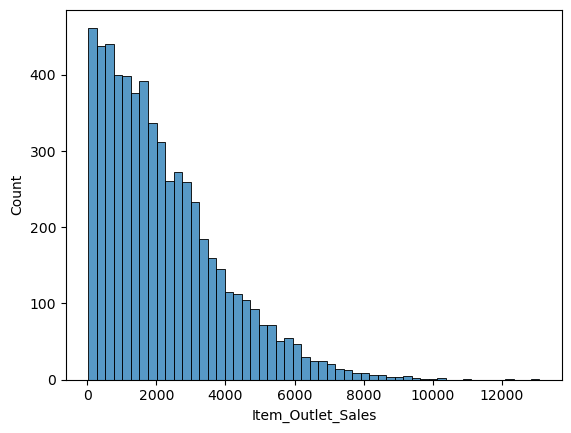

In [152]:
sns.histplot(y_train)

In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import cross_validate
import numpy as np

In [154]:
def train_and_eval_model(model, X_train, y_train, cv=5):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=('r2', 'neg_root_mean_squared_error'),)
    print('Model: ', model)
    r2_scores = cv_results['test_r2']
    print('R2 CV scores: ', r2_scores)
    print('R2 CV mean score / stdev: ', np.mean(r2_scores), '/', np.std(r2_scores))

    rmse_scores = cv_results['test_neg_root_mean_squared_error']
    rmse_scores = [-1*score for score in rmse_scores]
    print('RMSE CV scores: ', rmse_scores)
    print('RMSE CV mean score / stdev: ', np.mean(rmse_scores), '/', np.std(rmse_scores))


In [155]:
rf = RandomForestRegressor(random_state=SEED)
train_and_eval_model(model = rf, X_train=X_train_final,y_train= y_train, cv=5)

Model:  RandomForestRegressor(random_state=42)
R2 CV scores:  [0.57060768 0.5268083  0.54281021 0.55421798 0.52017727]
R2 CV mean score / stdev:  0.5429242875459817 / 0.01828158855152387
RMSE CV scores:  [1104.0666302663794, 1168.4808032468748, 1180.6054342042014, 1154.4334423647522, 1202.0836655939197]
RMSE CV mean score / stdev:  1161.9339951352256 / 32.888811410647826


In [156]:
dt = DecisionTreeRegressor(random_state=SEED)
train_and_eval_model(model =dt, X_train=X_train_final,y_train= y_train, cv=5)

Model:  DecisionTreeRegressor(random_state=42)
R2 CV scores:  [0.24729985 0.18476622 0.26592421 0.28286824 0.19385785]
R2 CV mean score / stdev:  0.2349432739761632 / 0.039025773074077084
RMSE CV scores:  [1461.7703474281284, 1533.7130265455883, 1495.984059182881, 1464.2225899566706, 1558.117134024314]
RMSE CV mean score / stdev:  1502.7614314275168 / 38.03603316393649


In [157]:
xgr = xgb.XGBRegressor(objective='reg:squarederror',random_state=SEED)
train_and_eval_model(model = xgr, X_train=X_train_final,y_train= y_train, cv=5)

Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
R2 CV scores:  [0.57730972 0.55914207 0.54421335 0.58393553 0.52431207]
R2 CV mean score / stdev:  0.5577825481764618 / 0.021778582707669483
RMSE CV scores:  [1095.416494682338, 1127.8526118741622, 1178.792371186943, 1115.290340217991, 1196.8

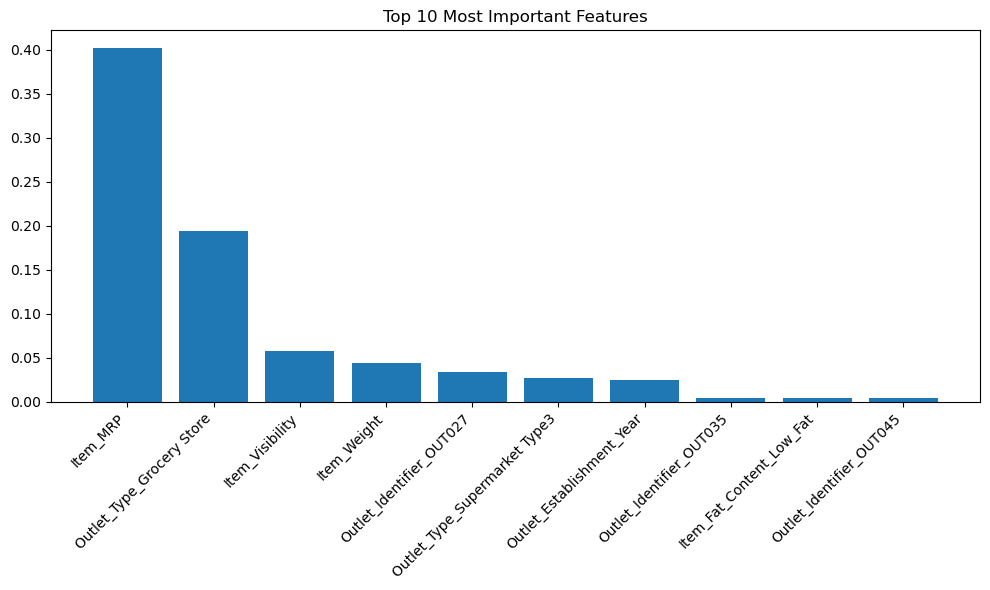

In [158]:
import matplotlib.pyplot as plt

rf.fit(X_train_final, y_train)  
importance = rf.feature_importances_

feature_importance = pd.DataFrame({'feature': X_train_final.columns, 
                                 'importance': importance})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

In [159]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

xgr.fit(X_train_final, y_train)

# Make predictions on test set
y_pred = xgr.predict(X_test_final)

# Calculate evaluation metrics

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Test Set R2 Score: {r2:.4f}')
print(f'Test Set RMSE: {rmse:.4f}')

Test Set R2 Score: 0.5701
Test Set RMSE: 1097.2946


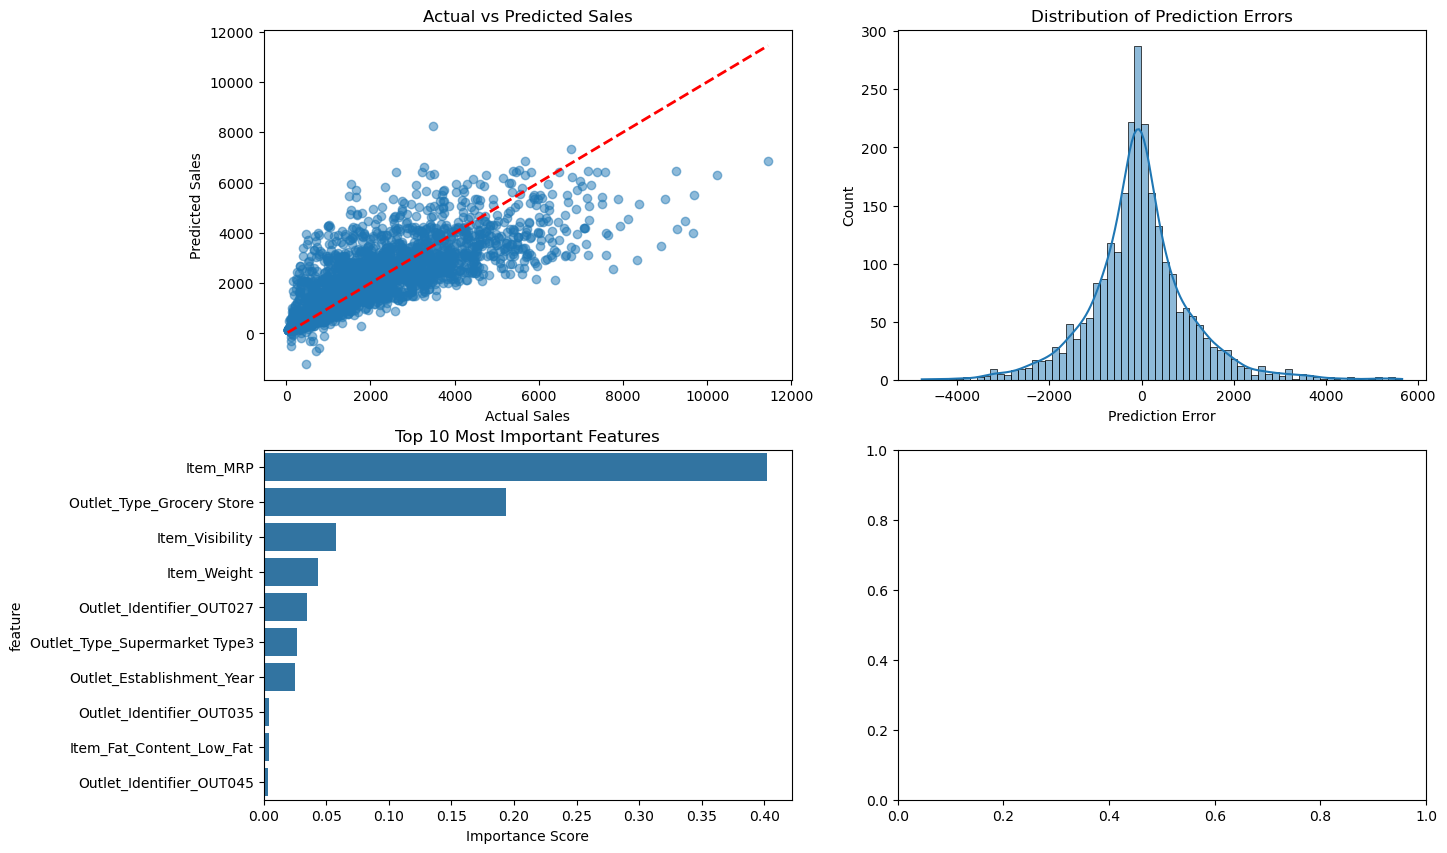

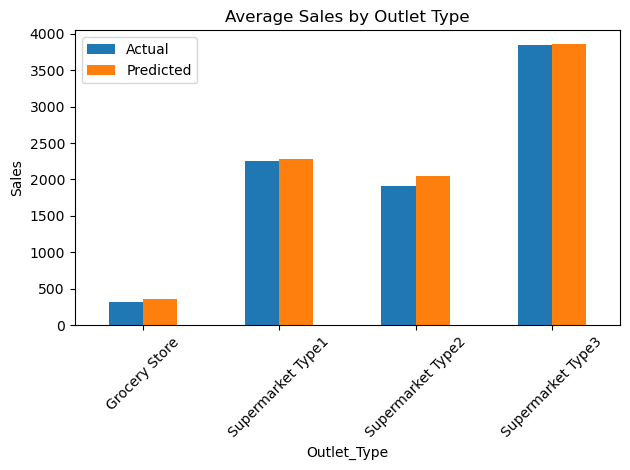


Model Performance Metrics:
R2 Score: 0.5701
RMSE: 1097.2946

Top 5 Most Important Features:
                        feature  importance
2                      Item_MRP    0.402146
1569  Outlet_Type_Grocery Store    0.193686
1               Item_Visibility    0.057555
0                   Item_Weight    0.043806
1558   Outlet_Identifier_OUT027    0.034249


In [160]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Set up the figure with subplots
fig = plt.figure(figsize=(15, 10))

# 1. Actual vs Predicted Values
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

# 2. Prediction Error Distribution
plt.subplot(2, 2, 2)
errors = y_test - y_pred
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.title('Distribution of Prediction Errors')

# 3. Top 10 Important Features
plt.subplot(2, 2, 3)
top_10_features = feature_importance.nlargest(10, 'importance')
sns.barplot(x='importance', y='feature', data=top_10_features)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')

# 4. Sales by Outlet Type
plt.subplot(2, 2, 4)
avg_sales = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Outlet_Type': X_test['Outlet_Type']
}).groupby('Outlet_Type').mean()

avg_sales.plot(kind='bar')
plt.title('Average Sales by Outlet Type')
plt.xticks(rotation=45)
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

# Additional insights
print("\nModel Performance Metrics:")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

print("\nTop 5 Most Important Features:")
print(feature_importance.nlargest(5, 'importance')[['feature', 'importance']])

#### Dựa vào các features có ảnh hưởng lớn nhất đến doanh thu ta có thể có những chiến lược sau:

Chiến lược phân khúc sản phẩm(Item_MRP (trọng lượng của sản phẩmphẩm)):

+ Những sản phẩm giá cao nên cho vào siêu thị

+ Những sản phẩm giá thấp ưu tiên cho vào tạp hóa 

Chiến lược tối ưu vị trí trưng bày (Item_Visibility(% diện tích trưng bày so với tổng số sản phẩmphẩm)):
+ Giảm diện tích trưng bày cho sản phẩm có Item_Visibility cao nhưng doanh thu thấp, thay thế bằng sản phẩm có tiềm năng hơn.

Chiến lược tối ưu vị trí trưng bày (Item_Visibility):
+ Giảm diện tích trưng bày cho sản phẩm có Item_Visibility cao nhưng doanh thu thấp, thay thế bằng sản phẩm có tiềm năng hơn.


